In [1]:
import pandas as pd
from src.features.preprocess_data import fetch_preprocessed_uniform_data


X_train, y_train, X_val, y_val = fetch_preprocessed_uniform_data()


# Display the first few rows of each dataset
X_train.head(), y_train.head(), X_val.head(), y_val.head()


c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:360: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample("1H").mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:360: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample("1H").mean()


                    time  pv_measurement       date_forecast  \
4355 2019-12-01 09:00:00            4.40 2019-12-01 09:00:00   
4356 2019-12-01 10:00:00           66.00 2019-12-01 10:00:00   
4357 2019-12-01 11:00:00           41.80 2019-12-01 11:00:00   
4358 2019-12-01 12:00:00            4.62 2019-12-01 12:00:00   
4359 2019-12-01 13:00:00            0.00 2019-12-01 13:00:00   

      absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_energy_1h:J  \
4355                     4.800              1.27200           27331.500000   
4356                     4.825              1.27300           98679.046875   
4357                     4.800              1.27350          142199.703125   
4358                     4.750              1.27525          125991.281250   
4359                     4.650              1.27700           61200.398438   

      clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
4355        17.549999        456.250000              0.0      273

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:360: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample("1H").mean()


(       absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_energy_1h:J  \
 93098                       4.4              1.27800           38284.226562   
 93170                       2.5              1.29550           40293.773438   
 34577                       1.8              1.32875          210171.046875   
 34646                       1.9              1.32400             904.349976   
 85456                       0.9              1.40200               0.000000   
 
        clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
 93098        18.150000        438.274994              0.0      271.849976   
 93170        18.950001       1274.599976             -0.5      264.750000   
 34577        63.474998        743.900024              0.0      260.750000   
 34646         2.375000        927.349976              0.0      261.700012   
 85456         0.000000         28.075001              0.0      253.500000   
 
        diffuse_rad:W  diffuse_rad_1h:J  direct_

# AutoML use of TPOT
We will use TPOT as the AutoML tool, which is a Python library for optimizing machine learning pipelines using genetic programming. TPOT will automatically explore hundreds of possible pipelines to find the best one for the dataset.

#### Steps:
1. Split the merged training datasets into feature matrices X and target vectors y.
2- Divide the datasets into training and validation subsets.
3. Configure TPOT and run it on the datasets to find the best model and preprocessing pipeline.
4. Evaluate the model on the validation set using Mean Absolute Error (MAE).
5. Finally, make predictions on the test dataset.
6. 
Let's start by preparing the feature matrices and target vectors and splitting them into training and validation subsets.

In [5]:
(X_train.shape, X_val.shape, 
 y_train.shape, y_val.shape)


((2783, 53), (696, 53), (2783,), (696,))

In [6]:
%pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [7]:
from tpot import TPOTRegressor
from sklearn.metrics import mean_absolute_error
# Initialize the TPOT Regressor with configurations


tpot = TPOTRegressor(
    generations=5,
    population_size=40,
    verbosity=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    early_stop=5
)

# Run TPOT on the training subset of the observed dataset to find the best model and preprocessing pipeline
tpot.fit(X_train, y_train)




Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -17.07389001935216

Generation 2 - Current best internal CV score: -16.13843608248639

Generation 3 - Current best internal CV score: -16.13843608248639

Generation 4 - Current best internal CV score: -16.096295245369344

Generation 5 - Current best internal CV score: -15.83693161088147

Best pipeline: ExtraTreesRegressor(StandardScaler(XGBRegressor(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=16, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.6500000000000001, verbosity=0)), bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=5, min_samples_split=16, n_estimators=100)


TPOTRegressor(generations=5, n_jobs=-1, population_size=20, random_state=42,
              scoring='neg_mean_absolute_error', verbosity=2)

In [8]:
# Evaluate the best model on the validation subset of the observed dataset
y_pred = tpot.predict(X_val)
mae_observed = mean_absolute_error(y_val, y_pred)

print(f'Mean Absolute Error on Validation Set: {mae_observed}')

Mean Absolute Error on Validation Set: 13.897235619221691


Model Analysis


In [19]:
# Extract the trained RandomForestRegressor from TPOT
rf_model = tpot.fitted_pipeline_.steps[-1][1]

# 2. Model Parameters
model_parameters = rf_model.get_params()
print("Model Parameters:")
print(model_parameters)

# Optionally: Additional Performance Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on other performance metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")
print(f"R-squared on Validation Set: {r2}")

# Create a python file of the optimized pipeline
tpot.export('optimized_pipeline_tpot.py')

Model Parameters:
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.6500000000000001, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Mean Squared Error on Validation Set: 4503.922210093811
R-squared on Validation Set: 0.5953000009871579


C:\Users\Bruker\AppData\Local\Temp\ipykernel_20792\2782280969.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2, color='red', label='Perfect Prediction Line')


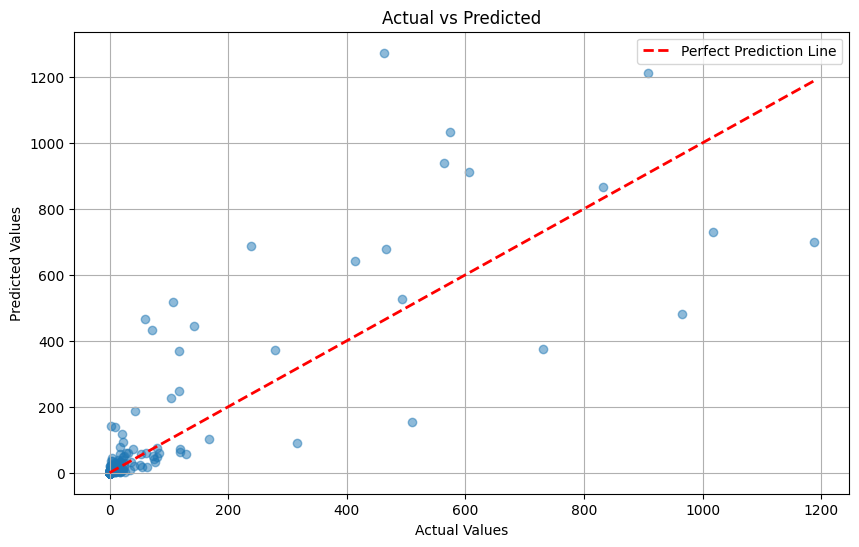

In [12]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(actual, predicted):
    plt.figure(figsize=(10,6))
    
    # Scatter plot of actual vs predicted values
    plt.scatter(actual, predicted, alpha=0.5)
    
    # Line for perfect predictions
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2, color='red', label='Perfect Prediction Line')
    
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage:
plot_actual_vs_predicted(y_val, y_pred)


In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from tpot.export_utils import set_param_recursive


X_train, y_train, X_val, y_val = fetch_preprocessed_uniform_data()

# Average CV score on the training set was: -15.83693161088147
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.001, max_depth=9, min_child_weight=16, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.6500000000000001, verbosity=0)),
    StandardScaler(),
    ExtraTreesRegressor(bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=5, min_samples_split=16, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_val)

print(f"MAE: {mean_absolute_error(y_val, results)}")

                    time  pv_measurement       date_forecast  \
4355 2019-12-01 09:00:00            4.40 2019-12-01 09:00:00   
4356 2019-12-01 10:00:00           66.00 2019-12-01 10:00:00   
4357 2019-12-01 11:00:00           41.80 2019-12-01 11:00:00   
4358 2019-12-01 12:00:00            4.62 2019-12-01 12:00:00   
4359 2019-12-01 13:00:00            0.00 2019-12-01 13:00:00   

      absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_energy_1h:J  \
4355                      4.80                 1.27               27331.50   
4356                      4.83                 1.27               98679.05   
4357                      4.80                 1.27              142199.70   
4358                      4.75                 1.28              125991.28   
4359                      4.65                 1.28               61200.40   

      clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  ...  \
4355            17.55            456.25             0.00         

In [22]:
# Make predictions using the trained Linear Regression model on the processed test estimated data
from src.features.preprocess_data import get_final_prediction
from src.features.preprocess_data import get_preprocessed_test_data, fetch_preprocessed_data
from src.models.saving import save_predictions

X_test_a, X_test_b, X_test_c = get_preprocessed_test_data()

y_pred_a = exported_pipeline.predict(X_test_a)
y_pred_b = exported_pipeline.predict(X_test_b)
y_pred_c = exported_pipeline.predict(X_test_c)
# Combine the predictions from the three locations into a single dataframe

y_pred_test_est_combined = get_final_prediction(y_pred_a, y_pred_b, y_pred_c)
y_pred_test_est_combined.head(20)

save_predictions(y_pred_test_est_combined, 'tpot_predictions_xgb_')

            date_calc       date_forecast  absolute_humidity_2m:gm3  \
0 2023-04-30 07:00:04 2023-05-01 00:00:00                      4.40   
1 2023-04-30 07:00:04 2023-05-01 00:15:00                      4.30   
2 2023-04-30 07:00:04 2023-05-01 00:30:00                      4.30   
3 2023-04-30 07:00:04 2023-05-01 00:45:00                      4.30   
4 2023-04-30 07:00:04 2023-05-01 01:00:00                      4.30   

   air_density_2m:kgm3  clear_sky_energy_1h:J  clear_sky_rad:W  \
0                 1.29                   0.00             0.00   
1                 1.29                   0.00             0.00   
2                 1.29                   0.00             0.00   
3                 1.29                   0.00             0.00   
4                 1.29                   0.00             0.00   

   cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  ...  \
0           1041.20             0.00          271.70           0.00  ...   
1           1054.80     

NameError: name 'save_predictions' is not defined

# H2O's AutoML 
H2O's AutoML provides automated model selection and ensemble learning. It trains a variety of models and stacks them to produce a highly accurate ensemble.

In [15]:
%pip install h2o
import h2o
from h2o.automl import H2OAutoML

# Initialize the H2O cluster
h2o.init()
X_target = X_train.copy()
y_target = y_train.copy()
train_data = X_target.join(y_target)
X_target = X_val.copy()
y_target = y_val.copy()
test_data = X_target.join(y_target)
# Convert pandas DataFrame to H2OFrame
hf_train = h2o.H2OFrame(train_data)
hf_test = h2o.H2OFrame(test_data) 

# Specify the name of the target variable in your dataset
target = 'pv_measurement'

# Run AutoML for the observed dataset
aml_observed = H2OAutoML(max_models=20, seed=1, max_runtime_secs=3600)
aml_observed.train(y=target, training_frame=hf_train)

# View the AutoML Leaderboard for the observed dataset
lb_observed = aml_observed.leaderboard
print(lb_observed.head(rows=lb_observed.nrows))

# Predict with the leader model on the test dataset
hf_test_pred_observed = aml_observed.leader.predict(hf_test)
print(hf_test_pred_observed.head())



Note: you may need to restart the kernel to use updated packages.
Checking whether there is an H2O instance running at http://localhost:54321.

 connected.


H2O_cluster_uptime:,8 mins 37 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_Bruker_esm1q3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.524 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
00:33:58.175: AutoML: XGBoost is not available; skipping it.
00:33:58.217: _train param, Dropping bad and constant columns: [no_clouds]
00:33:58.948: _train param, Dropping bad and constant columns: [no_clouds]

██
00:34:03.342: _train param, Dropping bad and constant columns: [no_clouds]
00:34:05.965: _train param, Dropping bad and constant columns: [no_clouds]
00:34:07.161: _train param, Dropping bad and constant columns: [no_clouds]

███
00:34:08.166: _train param, Dropping bad and constant columns: [no_clouds]
00:34:09.413: _train param, Dropping bad and constant columns: [no_clouds]
00:34:12.300: _train param, Dropping bad and constant columns: [no_clouds]

████
00:34:13.553: _train param, Dropping bad and constant columns: [no_clouds]

██████████████████████████████████████

In [16]:
hf_test_pred_observed

predict
0.587824
1.37992
743.706
1.1774
0.899292
-2.42
-3.10936
0.821599
0.856829
0.708005


# AutoGluon
Developed by AWS, AutoGluon enables easy-to-use and easy-to-extend AutoML with a focus on deep learning and real-world applications.

In [17]:
%pip install autogluon
from autogluon.tabular import TabularDataset, TabularPredictor
print("Autogluon version:", ag.__version__)
# Specify the name of the target variable in your dataset
target = 'pv_measurement'

# Load data (can be skipped if you have already prepared your DataFrames)
# train_observed_merged = pd.read_csv('path_to_your/train_observed_merged.csv')
# train_estimated_merged = pd.read_csv('path_to_your/train_estimated_merged.csv')
# test_merged = pd.read_csv('path_to_your/test_merged.csv')

# Create an AutoGluon dataset from the DataFrame (can be skipped if you have already prepared your DataFrames)
train_observed_data = TabularDataset(df=train_data)
# If train_estimated_merged is not empty
# train_estimated_data = TabularDataset(df=train_estimated_merged)
test_data = TabularDataset(df=test_data)

# Train AutoGluon on the observed dataset
predictor_observed = TabularPredictor(label=target).fit(train_observed_data)

# Evaluate on a test dataset (optional)
# performance = predictor_observed.evaluate(test_data)

# Make predictions on the test dataset
predictions_observed = predictor_observed.predict(test_data)

# If you also want to run AutoGluon for the estimated dataset, you can repeat the process
# predictor_estimated = TabularPredictor(label=target).fit(train_estimated_data)
# predictions_estimated = predictor_estimated.predict(test_data)



  Obtaining dependency information for autogluon from https://files.pythonhosted.org/packages/2e/42/f26592ecf3dc4e4edcbc5f7f7e3deba25b0681fad2ad04a82d12af17e3a4/autogluon-0.8.2-py3-none-any.whl.metadata
  Using cached autogluon-0.8.2-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for autogluon.core[all]==0.8.2 from https://files.pythonhosted.org/packages/e0/56/545adb1d388e78591cd7e36de0c8b889c1944de362bdaeec0f31d01890df/autogluon.core-0.8.2-py3-none-any.whl.metadata
  Using cached autogluon.core-0.8.2-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for autogluon.features==0.8.2 from https://files.pythonhosted.org/packages/bb/ea/7892719f78a30aee1bf42c4a0540fbae98bfbdf56b85fab79ffc437eb687/autogluon.features-0.8.2-py3-none-any.whl.metadata
  Using cached autogluon.features-0.8.2-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for autogluon.tabular[all]==0.8.2 from https://files.pythonhosted.org/packages/f3/dc/0bd8cadb9a5e2f

ERROR: Could not install packages due to an OSError: [WinError 5] Ingen tilgang: 'C:\\Users\\Bruker\\OneDrive\\NTNU semester 05\\TDT4173 Maskinlæring\\ml_power_predictor\\venv\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Check the permissions.



ModuleNotFoundError: No module named 'autogluon'

# LazyPredict

In [18]:
%pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Specify the name of the target variable in your dataset
target = 'pv_measurement'

# Prepare your data
# If you haven't already split your observed dataset into training and validation subsets, you can do it as follows:


# Initialize LazyRegressor and fit on the data
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=mean_absolute_error)
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

# Display the models' performance
print(models)



ImportError: cannot import name '_check_pos_label_consistency' from 'sklearn.metrics._base' (c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\lib\site-packages\sklearn\metrics\_base.py)